## EE 521: Digital Signal Processors Lab 
## Assignment 3
- Submitted By:
 - Sqn Ldr Monark Singh
 - 214102322

In [1]:
# Importing the dependencies
import numpy as np
import matplotlib.pyplot as plt
from sympy import*
import sympy as sp
import cmath
from mpmath import *

### Question 1:

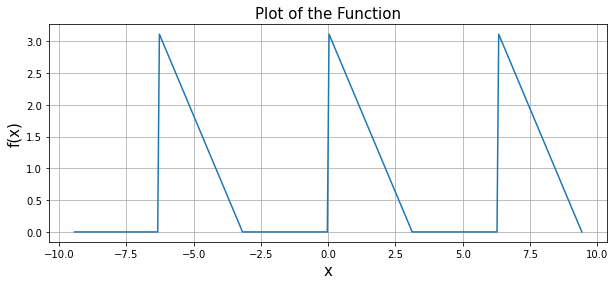

In [2]:
# Defining the function f(x)
x = np.linspace(-np.pi,np.pi,100)
N = len(x)
f = np.zeros(N)

for i in range(N):
    if x[i] >= 0:
        f[i] = np.pi - x[i]
      
 # Concatenating the array to generate the function till three time periods
f_ = np.tile(f,3)
x_ = np.linspace(-3*np.pi,3*np.pi,300)

plt.figure(figsize=(10,4))
plt.plot(x_,f_)
plt.title('Plot of the Function',size=15)
plt.xlabel('x',size=15)
plt.ylabel('f(x)',size=15)
plt.grid()
plt.show()

In [3]:
# Computing Fourier Series Coefficients
x,t = symbols('x,t')
init_printing(pretty_print=True)

N=20    # Number of Fourier Coefficients
A1 = np.zeros(N)
B1 = np.zeros(N)

Ao = (1/(2*np.pi)) * integrate((np.pi-x),(x,0,np.pi))

for n in range(1,N):
    A1[n] = (1/np.pi) * integrate(((np.pi-x) * sp.cos(n*x)) ,(x,0,np.pi))
    B1[n] = (1/np.pi) * integrate(((np.pi-x) * sp.sin(n*x)) ,(x,0,np.pi))
    
A1[0] = Ao

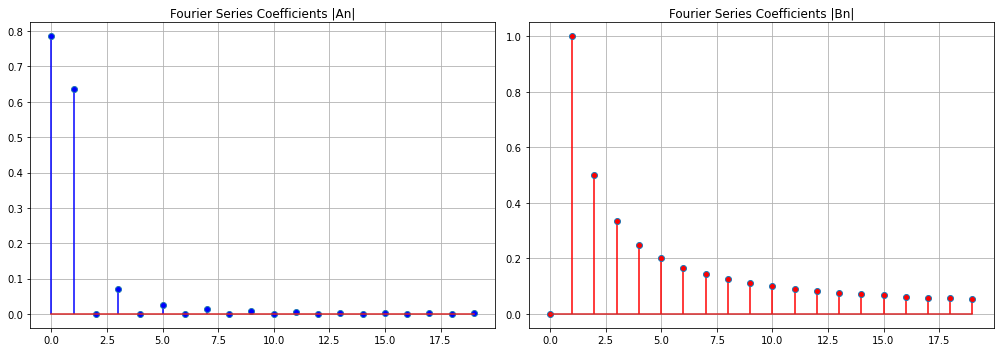

In [4]:
# Plotting Fourier Series Coefficients
n = np.arange(N)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
#plt.stem(0,a)
markerline, stemlines, baseline = plt.stem(n,A1,linefmt ='blue')
markerline.set_markerfacecolor('blue')
plt.title('Fourier Series Coefficients |An|')
plt.grid()

plt.subplot(1,2,2)
markerline, stemlines, baseline = plt.stem(n,B1,linefmt ='red')
markerline.set_markerfacecolor('red')
plt.title('Fourier Series Coefficients |Bn|')
plt.grid()

plt.tight_layout()
plt.show()

## Question 2:
### Fourier Series for Sawtooth Wave

In [5]:
N=10    # Number of Fourier Coefficients
A2 = np.zeros(N)
B2 = np.zeros(N)

# Computing the Fourier Series Coefficients
Ao = (1/2)*(integrate((2*x+1),(x,-1,0)) + integrate((1-2*x),(x,0,1)))

for n in range(1,N):
    A2[n] = (integrate(((2*x+1) * sp.cos(n*np.pi*x)) ,(x,-1,0)) + integrate(((1-2*x) * sp.cos(n*np.pi*x)) ,(x,0,1)))
    B2[n] = (integrate(((2*x+1) * sp.sin(n*np.pi*x)) ,(x,-1,0)) + integrate(((1-2*x) * sp.sin(n*np.pi*x)) ,(x,0,1)))

    
A2[0] = Ao


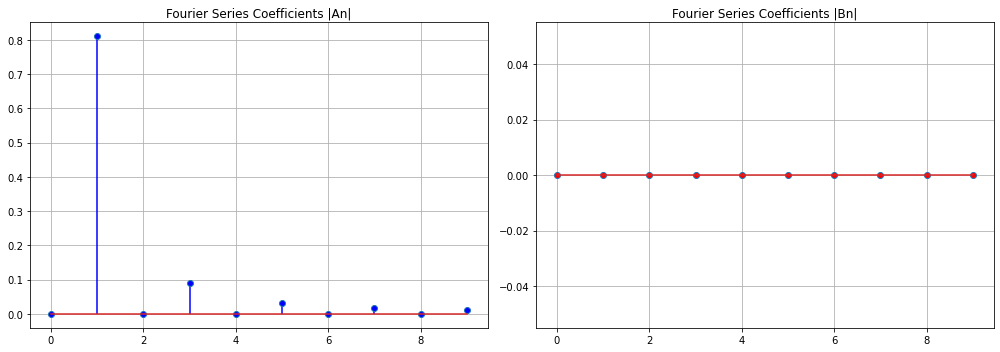

In [6]:
# Plotting Fourier Series Coefficients
n = np.arange(N)

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
markerline, stemlines, baseline = plt.stem(n,A2,linefmt ='blue')
markerline.set_markerfacecolor('blue')
plt.title('Fourier Series Coefficients |An|')
plt.grid()

plt.subplot(1,2,2)
markerline, stemlines, baseline = plt.stem(n,B2,linefmt ='red')
markerline.set_markerfacecolor('red')
plt.title('Fourier Series Coefficients |Bn|')
plt.grid()

plt.tight_layout()
plt.show()

### Computing the Partial Sum

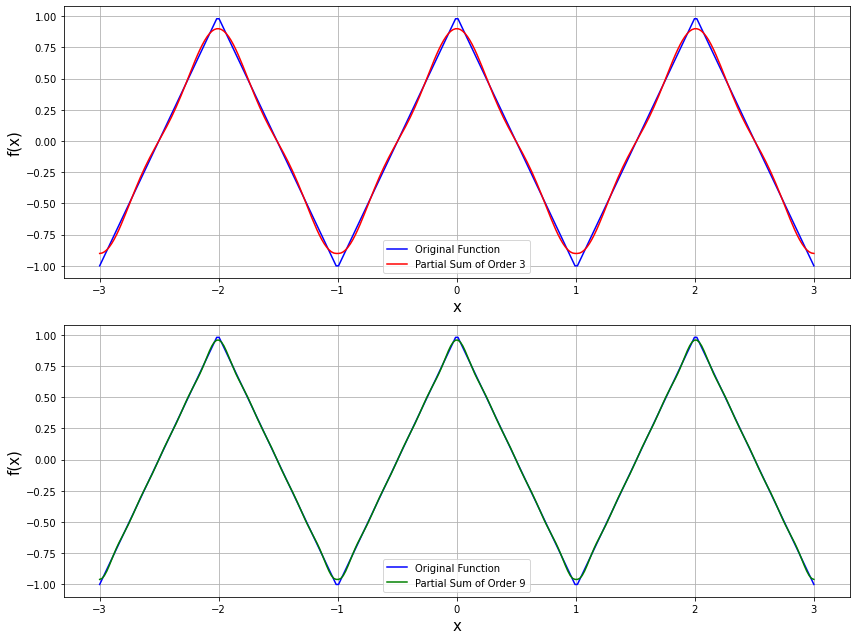

In [7]:
X = np.linspace(-1,1,100)
N = len(X)
fx = np.zeros(N)

## Defining the original Sawtooth function
for i in range(N):
    if X[i] <= 0:
        fx[i] = 2*X[i] +1
    else:
        fx[i] = 1 - 2*X[i]
        
# Concatenating the array to generate the function till three time periods
fx_ = np.tile(fx,3)
X_ = np.linspace(-3,3,300)

##### Computing Partial Sum of Order three: #####
fx1 =np.zeros(N)

for i in range(N):
    for n in range(3+1):
        fx1[i] += A2[n]*np.cos(n*np.pi*X[i]) + B2[n]*np.sin(n*np.pi*X[i])
      
    
# Concatenating the array to generate the partial sum till three time periods
fx1_ = np.tile(fx1,3)

##### Computing Partial Sum of Order 9: #####
fx2 =np.zeros(N)

for i in range(N):
    for n in range(9+1):
        fx2[i] += A2[n]*np.cos(n*np.pi*X[i]) + B2[n]*np.sin(n*np.pi*X[i])
 
 # Concatenating the array to generate the partial sum till three time periods
fx2_ = np.tile(fx2,3)

# plotting Original function and the partial sum of order three:
plt.figure(figsize=(12,9))

plt.subplot(2,1,1)
plt.plot(X_,fx_, color='blue', label='Original Function')
plt.plot(X_,fx1_, color='red', label='Partial Sum of Order 3')

plt.xlabel('x',size=15)
plt.ylabel('f(x)',size=15)
plt.grid()
plt.legend()


## plotting Original function and the partial sum of order nine:
plt.subplot(2,1,2)
plt.plot(X_,fx_, color='blue', label='Original Function')
plt.plot(X_,fx2_, color='green', label='Partial Sum of Order 9')

plt.xlabel('x',size=15)
plt.ylabel('f(x)',size=15)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

### Question 3:
### Fourier Transform

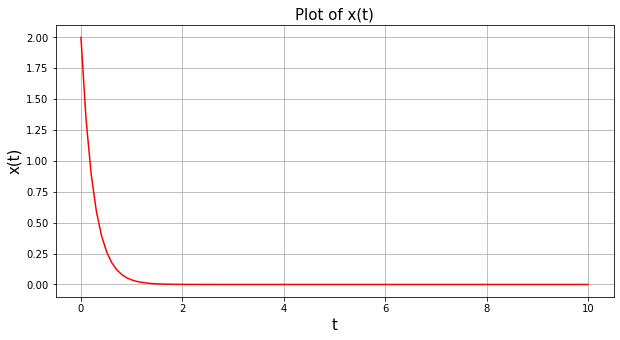

In [8]:
# Computing and Plotting the first function
t1 = np.linspace(0,10,100)
N = len(t1)
x1 = np.zeros(N)

A=2
a=4

for i in range(N):
    x1[i] = A*np.exp(-a*t1[i])
    
plt.figure(figsize=(10,5))
plt.plot(t1,x1, color='red')
plt.title('Plot of x(t)', size=15)
plt.xlabel('t', size=15)
plt.ylabel('x(t)', size=15)
plt.grid()

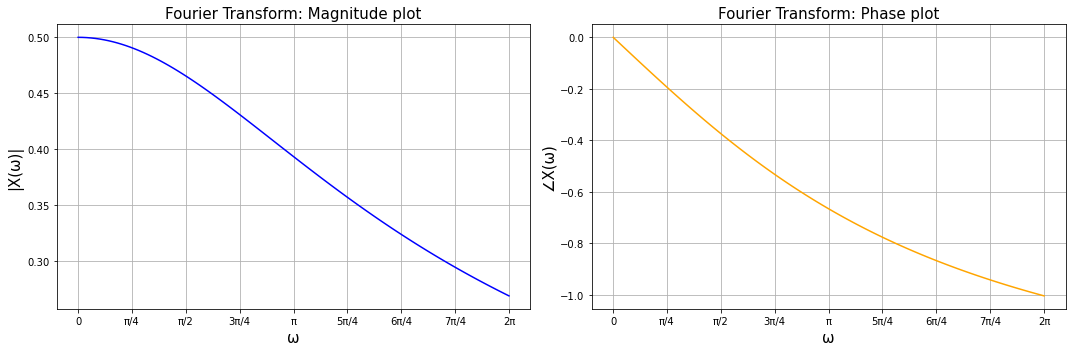

In [9]:
# Computing Fourier Transform
w = np.linspace(0,2*np.pi,100)
n = len(w)
X_real = np.zeros(n)
X_img = np.zeros(n)

for i in range(n):
    X_real[i] = integrate((A*sp.exp(-a*t)*sp.cos(w[i]*t)),(t,0,oo))
    X_img[i] = integrate((-A*sp.exp(-a*t)*sp.sin(w[i]*t)),(t,0,oo))

# Computing the Magnitude and Phase
magnitude1 = np.sqrt(X_real**2 + X_img**2)
phase1 = np.arctan(X_img/X_real)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(w,magnitude1, color='blue')
plt.title('Fourier Transform: Magnitude plot', size=15)
plt.xticks(np.arange(0, 2*np.pi+np.pi/4, step=(np.pi/4)), ['0','π/4','π/2','3π/4','π','5π/4','6π/4','7π/4','2π'])
plt.xlabel('ω', size=15)
plt.ylabel('|X(ω)|', size=15)
plt.grid()

plt.subplot(1,2,2)
plt.plot(w,phase1, color='orange')
plt.title('Fourier Transform: Phase plot', size=15)
plt.xticks(np.arange(0, 2*np.pi+np.pi/4, step=(np.pi/4)), ['0','π/4','π/2','3π/4','π','5π/4','6π/4','7π/4','2π'])
plt.xlabel('ω', size=15)
plt.ylabel('∠X(ω)', size=15)
plt.grid()

plt.tight_layout()
plt.show()

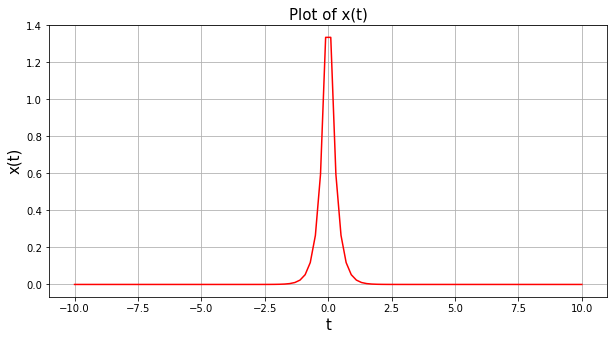

In [10]:
# Computing and Plotting the second function
t2 = np.linspace(-10,10,100)
N = len(t2)
x2 = np.zeros(N)

A=2
a=4

for i in range(N):
    if t2[i] >= 0:
        x2[i] = A*np.exp(-a*t2[i])
    
    else:
        x2[i] = A*np.exp(a*t2[i])
    
plt.figure(figsize=(10,5))
plt.plot(t2,x2, color='red')
plt.title('Plot of x(t)', size=15)
plt.xlabel('t', size=15)
plt.ylabel('x(t)', size=15)
plt.grid()

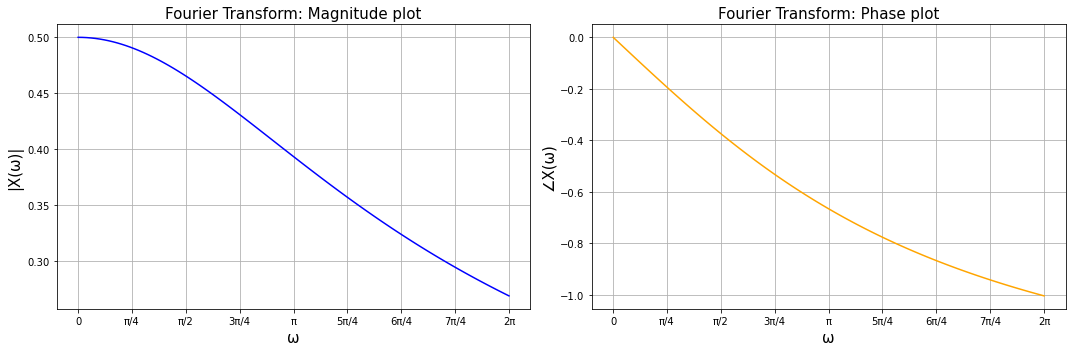

In [11]:
# Computing Fourier Transform
w = np.linspace(0,2*np.pi,100)
n = len(w)
X_real = np.zeros(n)
X_img = np.zeros(n)

for i in range(n):
    X_real[i] = integrate((A*sp.exp(-a*t)*sp.cos(w[i]*t)),(t,0,oo))
    X_img[i] = integrate((-A*sp.exp(-a*t)*sp.sin(w[i]*t)),(t,0,oo))

# Computing the Magnitude and Phase
magnitude2 = np.sqrt(X_real**2 + X_img**2)
angle2 = np.arctan(X_img/X_real)
    
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(w,magnitude2, color='blue')
plt.title('Fourier Transform: Magnitude plot', size=15)
plt.xticks(np.arange(0, 2*np.pi+np.pi/4, step=(np.pi/4)), ['0','π/4','π/2','3π/4','π','5π/4','6π/4','7π/4','2π'])
plt.xlabel('ω', size=15)
plt.ylabel('|X(ω)|', size=15)
plt.grid()

plt.subplot(1,2,2)
plt.plot(w,angle2, color='orange')
plt.title('Fourier Transform: Phase plot', size=15)
plt.xticks(np.arange(0, 2*np.pi+np.pi/4, step=(np.pi/4)), ['0','π/4','π/2','3π/4','π','5π/4','6π/4','7π/4','2π'])
plt.xlabel('ω', size=15)
plt.ylabel('∠X(ω)', size=15)
plt.grid()

plt.tight_layout()
plt.show()

### Question 4:

In [12]:
# Defining the expression for Fourier Transform
a = 0.8
w = np.linspace(0,2*np.pi,100)
n = len(w)

X = 1/(1-a*np.exp(-1j*w))

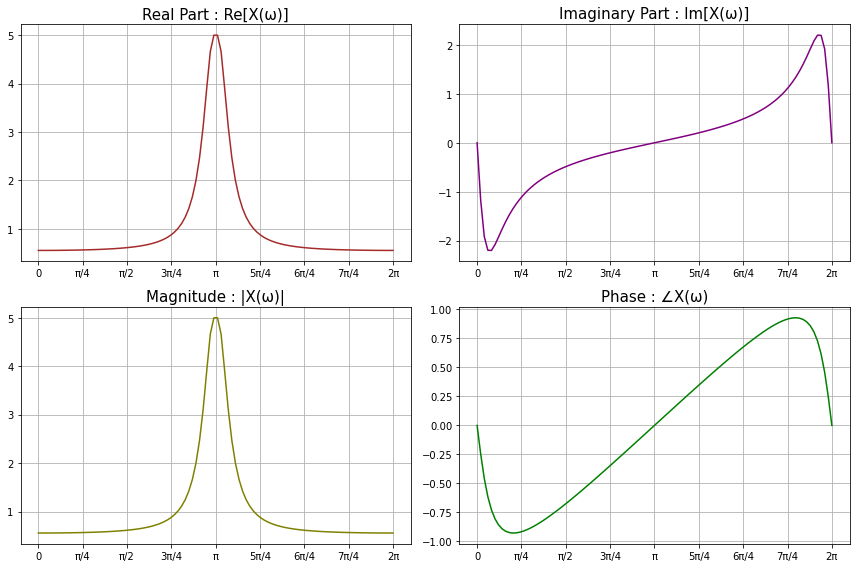

In [13]:
X_real = X.real          # Computing the Real part
X_img = X.imag           # Computing the Imaginary part
X_mag = abs(X)           # Computing the magnitude
X_angle = np.angle(X)    # Computing the phase

X_real1 = np.zeros(n)
X_mag1 = np.zeros(n)

for i in range(n):
    X_real1[i] = X_real[i-int(n/2)]
    X_mag1[i] = X_real[i-int(n/2)]

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(w,X_real1, color='brown')
plt.xticks(np.arange(0, 2*np.pi+np.pi/4, step=(np.pi/4)), ['0','π/4','π/2','3π/4','π','5π/4','6π/4','7π/4','2π'])
plt.title('Real Part : Re[X(ω)]', size=15)
plt.grid()

plt.subplot(2,2,2)
plt.plot(w,X_img, color='purple')
plt.xticks(np.arange(0, 2*np.pi+np.pi/4, step=(np.pi/4)), ['0','π/4','π/2','3π/4','π','5π/4','6π/4','7π/4','2π'])
plt.title('Imaginary Part : Im[X(ω)]', size=15)
plt.grid()

plt.subplot(2,2,3)
plt.plot(w,X_mag1, color='olive')
plt.xticks(np.arange(0, 2*np.pi+np.pi/4, step=(np.pi/4)), ['0','π/4','π/2','3π/4','π','5π/4','6π/4','7π/4','2π'])
plt.title('Magnitude : |X(ω)|', size=15)
plt.grid()

plt.subplot(2,2,4)
plt.plot(w,X_angle, color='green')
plt.xticks(np.arange(0, 2*np.pi+np.pi/4, step=(np.pi/4)), ['0','π/4','π/2','3π/4','π','5π/4','6π/4','7π/4','2π'])
plt.title('Phase : ∠X(ω)', size=15)
plt.grid()

plt.tight_layout()
plt.show()

### Question 5:
### Fourier Transform

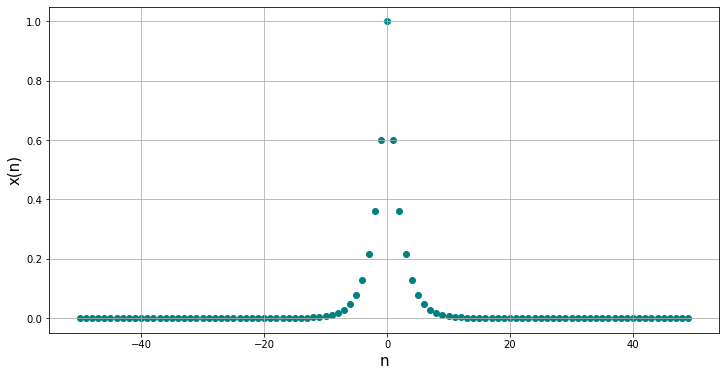

In [14]:
# Computing and Plotting x(n)
a = 0.6
n = np.arange(-50,50,1)
N = len(n)
X = np.zeros(N)

for i in range(N):
    if n[i] >= 0:
        X[i] = a**(n[i])
    
    else:
        X[i] = a**(-n[i])
        
plt.figure(figsize=(12,6))
plt.scatter(n,X,color='teal')
plt.xlabel('n',size=15)
plt.ylabel('x(n)',size=15)
plt.grid()

In [15]:
# Computing the Fourier Transform

w = np.linspace(0,2*np.pi,N) 
X_re = np.zeros(N)
X_im = np.zeros(N)

for i in range(N):
    for n in range(int(-N/2),int(N/2)):
        X_re[i] += X[n+int(N/2)]*cos(w[i]*n)   # Computing real part
        X_im[i] += -X[n+int(N/2)]*sin(w[i]*n)   # Computing imaginary part

# Computing Magnitude and Phase
mag = np.sqrt(X_re**2 + X_im**2)
ph = np.arctan(X_im/X_re)

mag1 = np.zeros(N)

for i in range(N):
    mag1[i] = mag[i-int(N/2)]

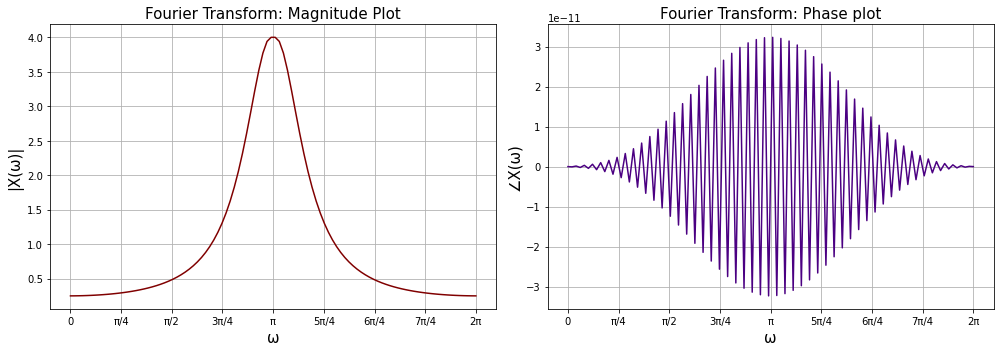

In [16]:
# Plotting the Frequency Spectrum
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(w,mag1, color='maroon')
plt.title('Fourier Transform: Magnitude Plot', size=15)
plt.xticks(np.arange(0, 2*np.pi+np.pi/4, step=(np.pi/4)), ['0','π/4','π/2','3π/4','π','5π/4','6π/4','7π/4','2π'])
plt.xlabel('ω', size=15)
plt.ylabel('|X(ω)|', size=15)
plt.grid()

plt.subplot(1,2,2)
plt.plot(w,ph, color='indigo')
plt.title('Fourier Transform: Phase plot', size=15)
plt.xticks(np.arange(0, 2*np.pi+np.pi/4, step=(np.pi/4)), ['0','π/4','π/2','3π/4','π','5π/4','6π/4','7π/4','2π'])
plt.xlabel('ω', size=15)
plt.ylabel('∠X(ω)', size=15)
plt.grid()

plt.tight_layout()
plt.show()

### Question 6:
### Discrete Fourier Transform (DFT)

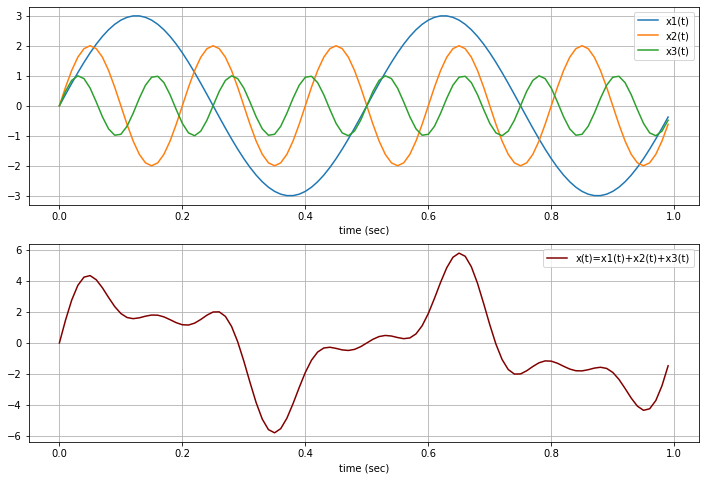

In [17]:
# Computing and Plotting the Signals

fs = 100     # Sampling frequency
ts = 1.0/fs  # sampling interval
t = np.arange(0,1,ts)
N = len(t)

X1 = np.zeros(N)
X2 = np.zeros(N)
X3 = np.zeros(N)
Xsum = np.zeros(N)

f1 = 2
f2 = 5
f3 = 8

# Generating the signals 
for i in range(N):
    X1[i] = 3*np.sin(2*np.pi*f1*t[i])
    X2[i] = 2*np.sin(2*np.pi*f2*t[i])
    X3[i] = 1*np.sin(2*np.pi*f3*t[i])
    Xsum[i] = X1[i] + X2[i] + X3[i]
    
# Plotting the signals
plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
plt.plot(t,X1, label='x1(t)')
plt.plot(t,X2, label='x2(t)')
plt.plot(t,X3, label='x3(t)')
plt.xlabel('time (sec)')
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(t,Xsum, label='x(t)=x1(t)+x2(t)+x3(t)', color='maroon')
plt.xlabel('time (sec)')
plt.legend()
plt.grid()
plt.show()

### Computing DFT 

In [23]:
# Defining a Function to compute the Discrete Fourier Transform of a 1D real-valued signal X
def DFT(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x)
    
    return X

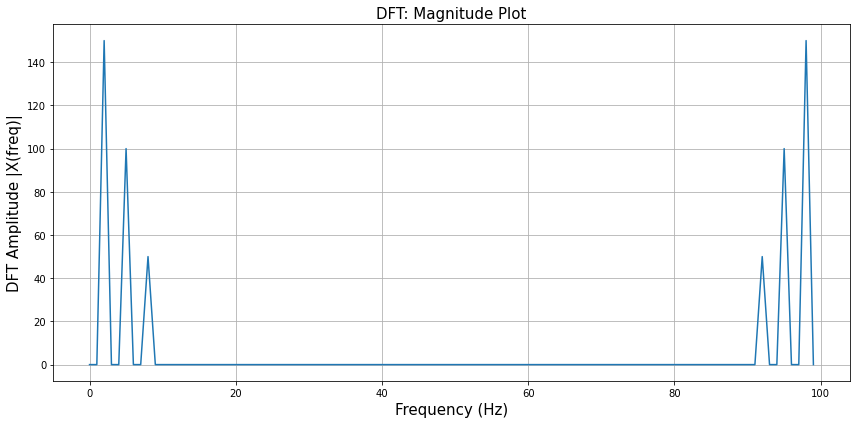

In [24]:
# Calling the DFT function
Y = DFT(Xsum)

f = np.arange(0,100,1)
r = [0]*N
phi = [0]*N

# Computing the Magnitude and Phase
for i in range(N):
    r[i],phi[i] = cmath.polar(Y[i])
    

# Plotting the Magnitude spectrum
plt.figure(figsize=(12,6))

plt.plot(f,r)
plt.title('DFT: Magnitude Plot', size=15)
plt.xlabel('Frequency (Hz)', size=15)
plt.ylabel('DFT Amplitude |X(freq)|', size=15)
plt.grid()


plt.tight_layout()
plt.show()

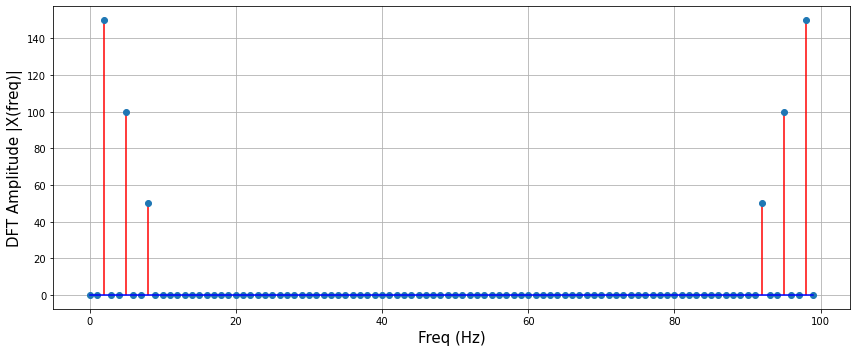

In [25]:
# Stem Plot
plt.figure(figsize = (12, 5))

plt.stem(f, abs(Y), 'red', markerfmt="o", basefmt="-b")
plt.xlabel('Freq (Hz)',size=15)
plt.ylabel('DFT Amplitude |X(freq)|',size=15)
plt.grid()

plt.tight_layout()
plt.show()

### Filtering the DFT Result

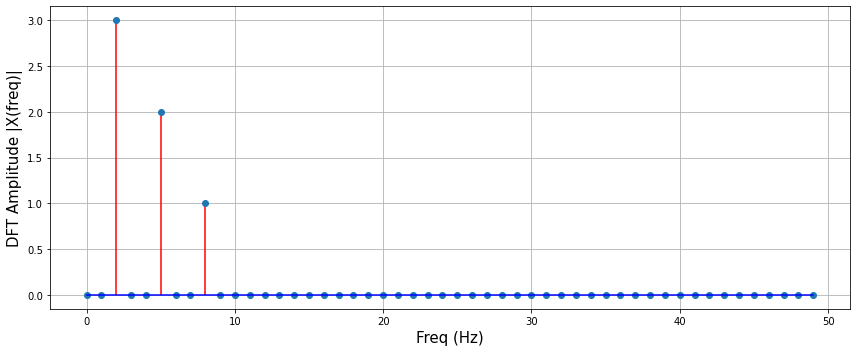

In [27]:
n = fs//2         # Considering frequencies upto half the sampling frequency
f_new = f[:n]     # Getting one side frequency

# Normalize the amplitude
X_filtered =Y[:n]/n

plt.figure(figsize = (12, 5))
plt.stem(f_new, abs(X_filtered), 'r', markerfmt="o", basefmt="-b")
plt.xlabel('Freq (Hz)',size=15)
plt.ylabel('DFT Amplitude |X(freq)|',size=15)
plt.grid()

plt.tight_layout()
plt.show()

### Question 7:

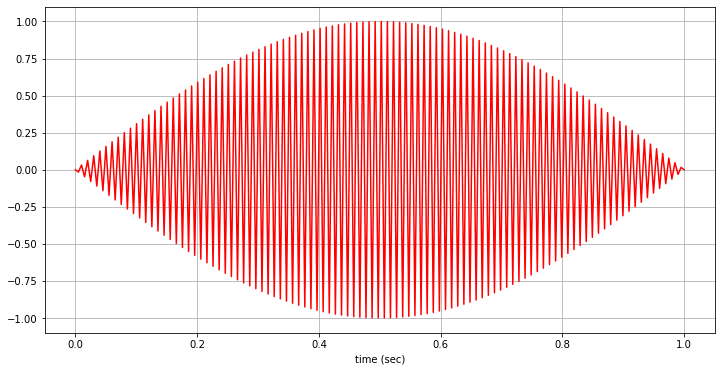

In [28]:
# Generate a sinewave
fs = 200                  # sampling frequency
t = np.linspace(0,1,fs)   # sampling interval
N = len(t)

freq = 100

X = np.sin(2*np.pi*freq*t)

plt.figure(figsize=(12,6))

plt.plot(t,X, color='red')
plt.xlabel('time (sec)')
plt.grid()
plt.show()

### Finding the True Spectrum

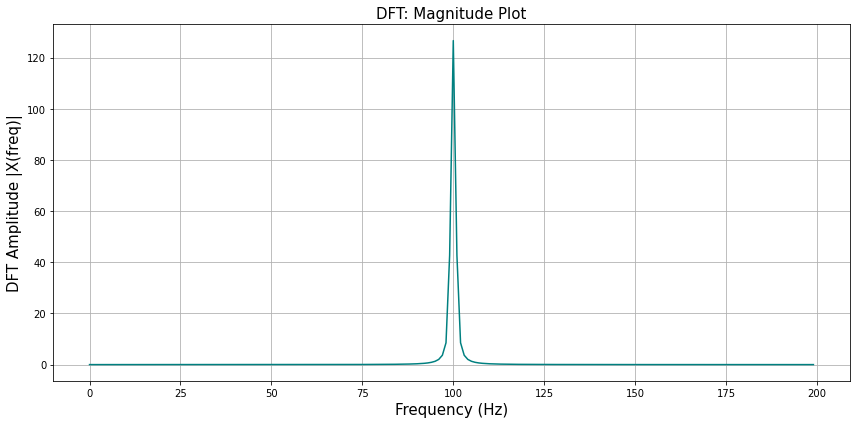

In [29]:
Y = DFT(X)

f = np.arange(0,200,1)
r = [0]*N
phi = [0]*N

for i in range(N):
    r[i],phi[i] = cmath.polar(Y[i])
    
    
plt.figure(figsize=(12,6))

plt.plot(f,r, color='teal')
plt.title('DFT: Magnitude Plot', size=15)
plt.xlabel('Frequency (Hz)', size=15)
plt.ylabel('DFT Amplitude |X(freq)|', size=15)
plt.grid()


plt.tight_layout()
plt.show()

In [30]:
# Generate rectangular windows

N1 = 80
N2 = 160

X1 = np.zeros(N)
X2 = np.zeros(N)

for i in range(N):
    if i<N1:
        X1[i] = 1

for i in range(N):
    if i<N2:
        X2[i] = 1
        
# Computing DFT of the Rectangular windows
Y1 = DFT(X1)
Y2 = DFT(X2)

r1 = [0]*N
phi1 = [0]*N

r2 = [0]*N
phi2 = [0]*N

for i in range(N):
    r1[i],phi1[i] = cmath.polar(Y1[i])
    r2[i],phi2[i] = cmath.polar(Y2[i])
    
r1_ = np.zeros(N)
r2_ = np.zeros(N)

for i in range(N):
    r1_[i] = r1[i-int(N/2)]
    r2_[i] = r2[i-int(N/2)]


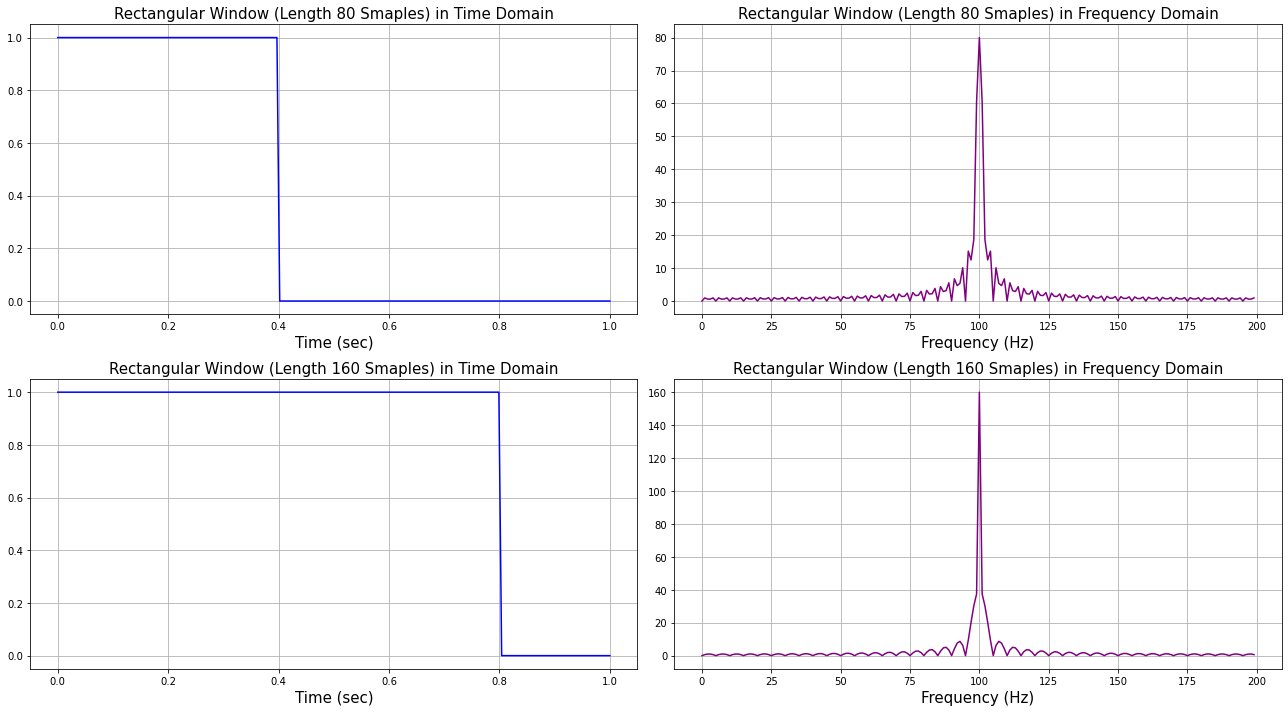

In [31]:
# Plotting the rectangular windows in Time and Frequency domain

plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
plt.plot(t,X1, color='blue')
plt.title('Rectangular Window (Length 80 Smaples) in Time Domain', size=15)
plt.xlabel('Time (sec)', size=15)
plt.grid()

plt.subplot(2,2,2)
plt.plot(f,r1_, color='purple')
plt.title('Rectangular Window (Length 80 Smaples) in Frequency Domain', size=15)
plt.xlabel('Frequency (Hz)', size=15)
plt.grid()

plt.subplot(2,2,3)
plt.plot(t,X2, color='blue')
plt.title('Rectangular Window (Length 160 Smaples) in Time Domain', size=15)
plt.xlabel('Time (sec)', size=15)
plt.grid()

plt.subplot(2,2,4)
plt.plot(f,r2_, color='purple')
plt.title('Rectangular Window (Length 160 Smaples) in Frequency Domain', size=15)
plt.xlabel('Frequency (Hz)', size=15)
plt.grid()

plt.tight_layout()
plt.show()

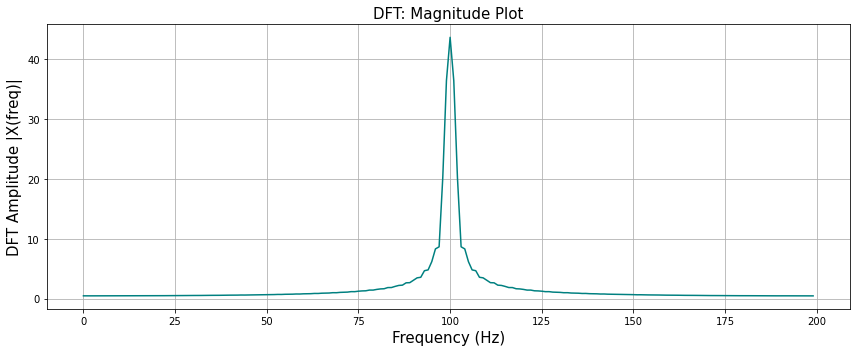

In [32]:
# Multiplying sinewave using rectangular window of duration 80 samples
X_1 = X * X1

# Computing the DFT
Y_1 = DFT(X_1)

f = np.arange(0,200,1)
r = [0]*N
phi = [0]*N

for i in range(N):
    r[i],phi[i] = cmath.polar(Y_1[i])
    
    
plt.figure(figsize=(12,5))

plt.plot(f,r, color='teal')
plt.title('DFT: Magnitude Plot', size=15)
plt.xlabel('Frequency (Hz)', size=15)
plt.ylabel('DFT Amplitude |X(freq)|', size=15)
plt.grid()


plt.tight_layout()
plt.show()

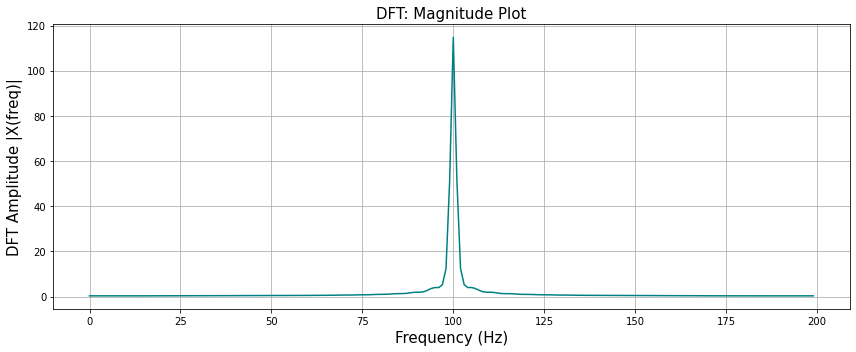

In [33]:
# Multiplying sinewave using rectangular window of duration 80 samples
X_2 = X * X2

# Computing the DFT
Y_2 = DFT(X_2)

f = np.arange(0,200,1)
r = [0]*N
phi = [0]*N

for i in range(N):
    r[i],phi[i] = cmath.polar(Y_2[i])
    
    
plt.figure(figsize=(12,5))

plt.plot(f,r, color='teal')
plt.title('DFT: Magnitude Plot', size=15)
plt.xlabel('Frequency (Hz)', size=15)
plt.ylabel('DFT Amplitude |X(freq)|', size=15)
plt.grid()


plt.tight_layout()
plt.show()